Homework 2 - Hypothesis Testing 

Sophia Walton, srw9rx

PROBLEM 1: 

In this problem you will experiment with unsupervised learning using K-means. You should
implement two functions: (1) clusterInit, which should initialize random clusters according to the “furthest first” heuristic (select the first center randomly from the data, select
subsequent centers as far as possible from any of the previous centers, e.g., if you’ve already
selected four centers, the fifth center should be the point whose distance to any of the 4
centers is maximum.), and (2) kmeans to run K-means on a set of input points.
Now test your K-means implementation on a simple set of 2D data (provided as 2D data.csv).

(a) Plot the data unclustered (in other words, all points are the same color). How many
clusters do you think there are? Use your answer to set K for all the experiments below.


In [1]:
#import statements 
from matplotlib import pyplot as plt 
import pandas 
import numpy
import math

In [2]:
#read in csv file 
twodimdata = pandas.read_csv('/Users/sophiawalton/Desktop/CS3501/Homework2/2D_data.csv', sep = '  ', index_col=None, names = ['x', 'y'], engine = 'python')

#create data frame 
datapoints = pandas.DataFrame(twodimdata)


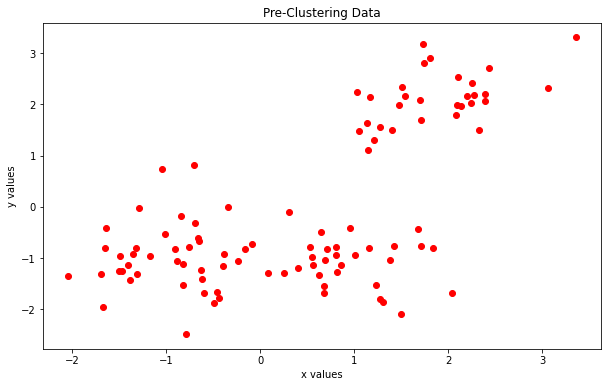

In [3]:
#plot datapoints 
fig, before = plt.subplots(figsize=(10, 6))

before.scatter(x = datapoints['x'], y = datapoints['y'], color ='red')
plt.xlabel("x values")
plt.ylabel("y values")
plt.title("Pre-Clustering Data")

plt.show()

From this data, it appears that there are 3 clusters.

(b) Plot the data clustered with your K-means algorithm and random initialization (center
points are picked uniformly randomly from the input data points). Use different colors
for each cluster of points. Repeat the previous clustering and plot the results for a total
of 5 times (using different random initialization each time). What do you notice about
the repeated results?

In [4]:
#create centers 
import random
def clusterInit(dataframe, num): 
    randnums = []
            
    for i in range(0,num):
        randnums.append(random.randrange(len(dataframe.index)))
    centers = []
    for num in randnums:
        center = []
        for column in dataframe.columns:
            center.append(dataframe.at[num, column])
        centers.append(center)
    return centers


In [5]:
#begin first clustering with k-means algorithm 
def kmeans(clusterarray, dataframe):
    returning = []
    #for each row
    for i in range(0, len(dataframe.index)):
        point = []
        for column in dataframe.columns:
            point.append(dataframe.at[i, column])
        dists = []
        
        for center in clusterarray:
            dist = 0
            for m in range(0, len(center)):
                dist+=(center[m]-point[m])**2
            dist = dist**0.5
            dists.append(dist)
        for l in range(0, len(dists)):
            if (min(dists) == dists[l]):
                returning.append(l)
    return returning 

#create the centers after the initial kmeans is run based on the previous centers    
    

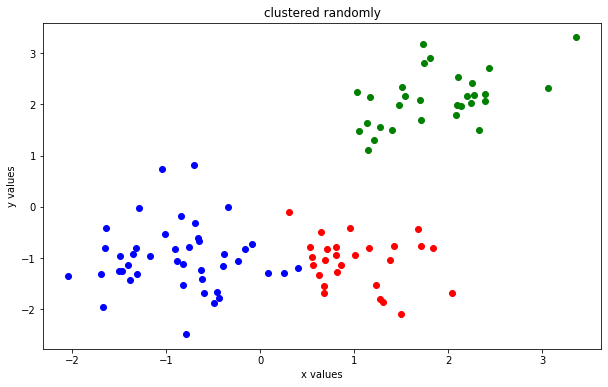

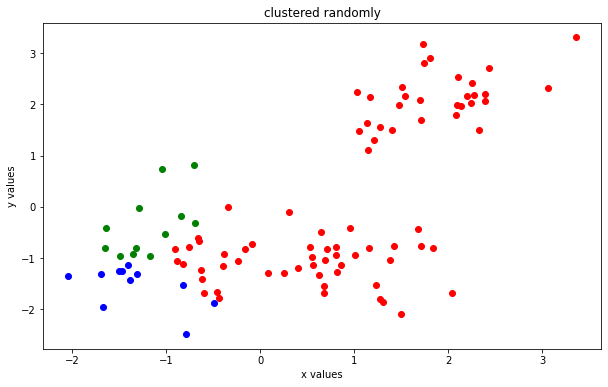

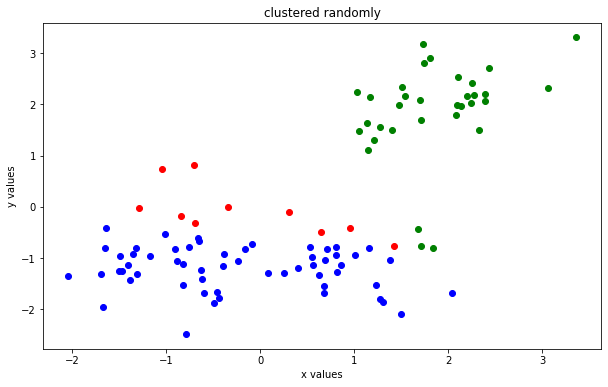

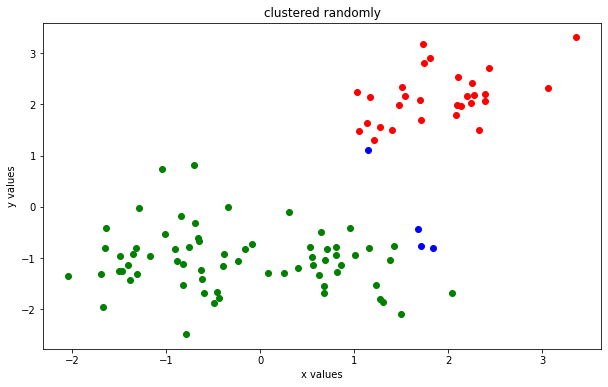

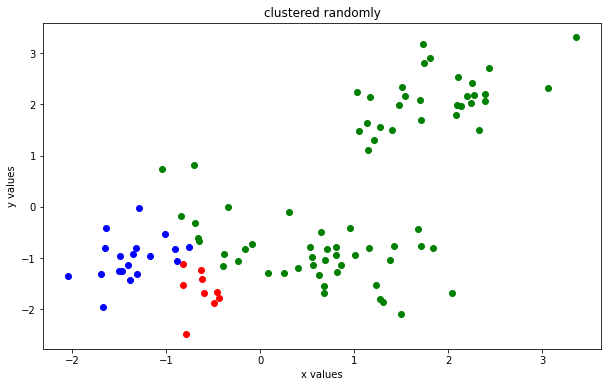

In [6]:
xlist = list(datapoints['x'])
ylist = list(datapoints['y'])

centerlist = clusterInit(datapoints, 3)

returner = kmeans(centerlist, datapoints)
datapoints['clusters'] = returner

if 0 in returner:
    cluster1 = datapoints.groupby('clusters').get_group(0)
if 1 in returner:
    cluster2 = datapoints.groupby('clusters').get_group(1)
if 2 in returner:
    cluster3 = datapoints.groupby('clusters').get_group(2)
fig, clusters = plt.subplots(figsize=(10, 6))

#draw the plot
if 0 in returner:
    clusters.scatter(x = cluster1['x'], y = cluster1['y'], color ='red')
if 1 in returner:
    clusters.scatter(x = cluster2['x'], y = cluster2['y'], color ='blue')
if 2 in returner:
    clusters.scatter(x = cluster3['x'], y = cluster3['y'], color ='green')
    
plt.xlabel("x values")
plt.ylabel("y values")
plt.title("clustered randomly")

plt.show()  
del datapoints['clusters']
    
#make center array
for i in range(1, 5):
    centerlist = clusterInit(datapoints, 3)
    returner = kmeans(centerlist, datapoints)
    datapoints['clusters'] = returner
    fig, myclusters = plt.subplots(figsize=(10, 6))

    if 0 in datapoints['clusters'].keys():
        cluster1 = datapoints.groupby(['clusters']).get_group(0)
        myclusters.scatter(x = cluster1['x'], y = cluster1['y'], color ='red')
    if 1 in datapoints['clusters'].keys():
        cluster2 = datapoints.groupby(['clusters']).get_group(1)
        myclusters.scatter(x = cluster2['x'], y = cluster2['y'], color ='blue')
    if 2 in datapoints['clusters'].keys():
        cluster3 = datapoints.groupby(['clusters']).get_group(2)
        myclusters.scatter(x = cluster3['x'], y = cluster3['y'], color ='green')
    
    plt.xlabel("x values")
    plt.ylabel("y values")
    plt.title("clustered randomly")

    plt.show()  
    del datapoints['clusters']

(c) Now run the K-means algorithm on the data 5 more times, with the same K, but now
using the “furthest first” intialization (each run should have a different random initialization for the first center point). Compare this to the uniform random initialization
result in part (b). What difference does it make?


In [7]:
#to make centers based on previous centers
#dataframe: the data to be tested 
#centers: the list of centers 
#clusters: the list of clusters assigned to each data point
def centerdef(dataframe, centers, clusters): 
    dataframe['clusters'] = clusters
    numbynums= []
    newcenters=[]
    for i in range(0, len(centers), 1):
        center = []
        if i in dataframe['clusters']:
            databynumber = dataframe.groupby('clusters').get_group(i)
            del databynumber['clusters']
            
            for column in range(0,len(databynumber.columns),1):
                number=pandas.Series(data=databynumber.iloc[:,column]).mean()
                center.append(number.astype(float))
        
        else:
            for k in range(0, len(dataframe.columns)):
                center[k]=random.randrange(int(min(dataframe.at(k)))) 
        newcenters.append(center)
    del dataframe['clusters']
    return newcenters
    


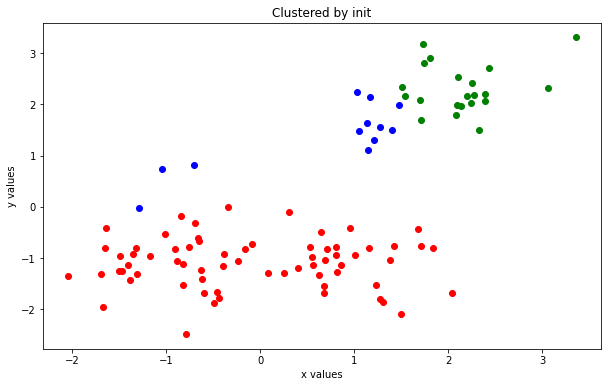

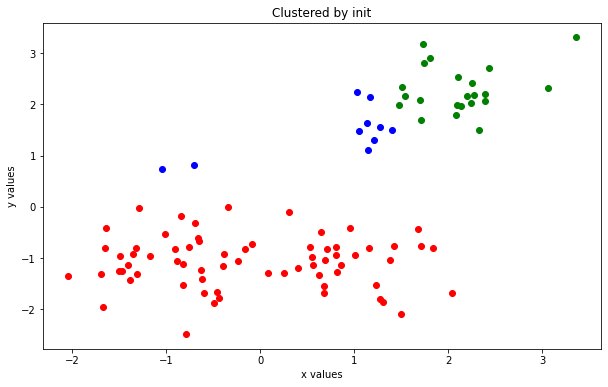

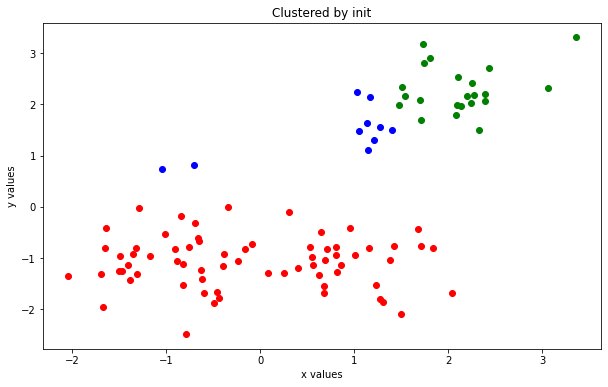

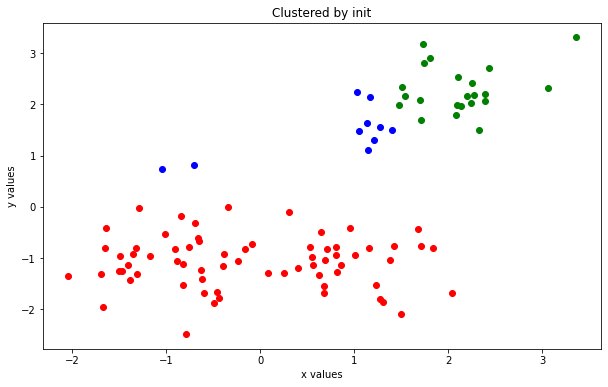

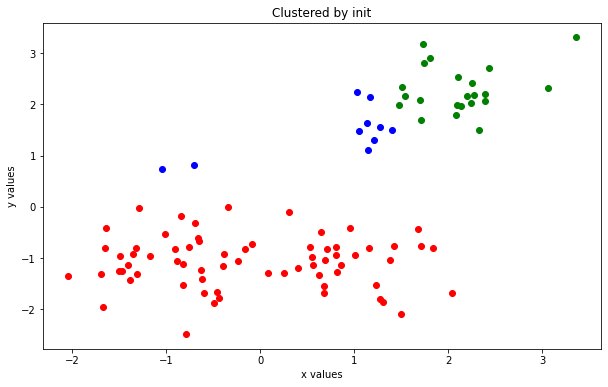

In [8]:
#initialize first center 
centerlist = clusterInit(datapoints, 3)
returner = kmeans(centerlist, datapoints)

datapoints['clusters'] = returner

if 0 in returner:
    cluster1 = datapoints.groupby('clusters').get_group(0)
if 1 in returner:
    cluster2 = datapoints.groupby('clusters').get_group(1)
if 2 in returner:
    cluster3 = datapoints.groupby('clusters').get_group(2)
fig, clusters = plt.subplots(figsize=(10, 6))

#draw the plot
if 0 in returner:
    clusters.scatter(x = cluster1['x'], y = cluster1['y'], color ='red')
if 1 in returner:
    clusters.scatter(x = cluster2['x'], y = cluster2['y'], color ='blue')
if 2 in returner:
    clusters.scatter(x = cluster3['x'], y = cluster3['y'], color ='green')
    
plt.xlabel("x values")
plt.ylabel("y values")
plt.title("Clustered by init")

plt.show() 
del datapoints['clusters']

for i in range(1,5):
    centerlist=centerdef(datapoints,centerlist, returner)
    returner = kmeans(centerlist, datapoints)
    datapoints['clusters'] = returner
    fig, myclusters = plt.subplots(figsize=(10, 6))
    if 0 in returner:
        cluster1 = datapoints.groupby('clusters').get_group(0)
        myclusters.scatter(x = cluster1['x'], y = cluster1['y'], color ='red')
    if 1 in returner:
        cluster2 = datapoints.groupby('clusters').get_group(1)
        myclusters.scatter(x = cluster2['x'], y = cluster2['y'], color ='blue')
    if 2 in returner:
        cluster3 = datapoints.groupby('clusters').get_group(2)
        myclusters.scatter(x = cluster3['x'], y = cluster3['y'], color ='green')

    plt.xlabel("x values")
    plt.ylabel("y values")
    plt.title("Clustered by init")

    plt.show()
    del datapoints['clusters']

Next, test your K-means clustering with the “furthest first” initialization on the MNIST
handwritten digits database (provided as “mnist.csv”). These are greyscale, 28 × 28 images
of digits 0 - 9. The table contains one image per row, flattened into a 784-dimensional vector.

In [9]:
#read in csv file for picture data 
piccsv = pandas.read_csv('/Users/sophiawalton/Desktop/CS3501/Homework2/mnist.csv',index_col=None, header=None)

#create data frame 
picdata = pandas.DataFrame(piccsv)
arraypicdata = picdata.to_numpy()


(d) Plot a 10 × 10 grid of 100 of the input data as images. Reshape each of the 784-
dimensional input data vectors as 28 × 28 arrays and display them as images.

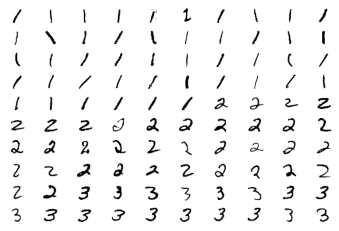

In [10]:
reshaped = []

for image in arraypicdata: 
    imagepic = image.reshape(28, 28)
    reshaped.append(imagepic)
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.axis("off")
    image = reshaped[i]
    plt.imshow(image, cmap = "Greys")
plt.show()

(e) Report the means found for K = 5, 10, 15. Again, reshape your mean vectors as 28 × 28
arrays and display them as images.

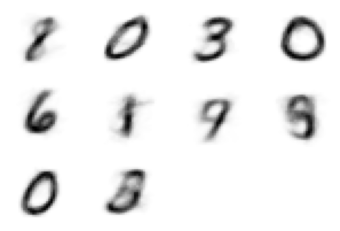

In [15]:
#test 5 times

#initializenumbers
mycenters = clusterInit(picdata, 10)
kmeanstest= kmeans(mycenters, picdata)

#do subsequent times
for i in range(1, 5, 1):
    mycenter = centerdef(picdata,mycenters,kmeanstest)
    kmeanstest = kmeans(mycenter, picdata)
mycenterdraw = centerdef(picdata,mycenters,kmeanstest)
mycenterdrawar = numpy.asarray(mycenterdraw)
reshaped = []

for image in mycenterdrawar: 
    imagepic = image.reshape(28, 28)
    reshaped.append(imagepic)
for i in range(0, len(reshaped)):
    plt.subplot(3, 4, i+1)
    plt.axis("off")
    image = reshaped[i]
    plt.imshow(image, cmap = "Greys")
plt.show()

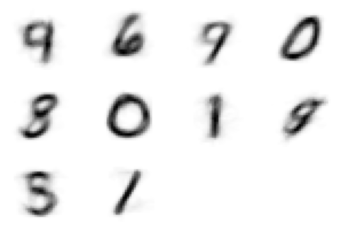

In [16]:
#test 10 times

#initializenumbers
mycenters = clusterInit(picdata, 10)
kmeanstest= kmeans(mycenters, picdata)

#do subsequent times
for i in range(1, 10, 1):
    mycenter = centerdef(picdata,mycenters,kmeanstest)
    kmeanstest = kmeans(mycenter, picdata)
mycenterdraw = centerdef(picdata,mycenters,kmeanstest)
mycenterdrawar = numpy.asarray(mycenterdraw)
reshaped = []

for image in mycenterdrawar: 
    imagepic = image.reshape(28, 28)
    reshaped.append(imagepic)
for i in range(0, len(reshaped)):
    plt.subplot(3, 4, i+1)
    plt.axis("off")
    image = reshaped[i]
    plt.imshow(image, cmap = "Greys")
plt.show()

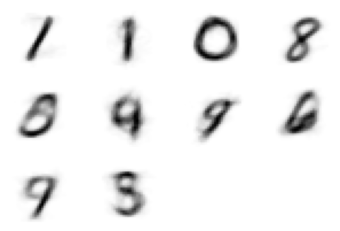

In [17]:
#test 15 times

#initializenumbers
mycenters = clusterInit(picdata, 10)
kmeanstest= kmeans(mycenters, picdata)

#do subsequent times
for i in range(1, 15, 1):
    mycenter = centerdef(picdata,mycenters,kmeanstest)
    kmeanstest = kmeans(mycenter, picdata)
mycenterdraw = centerdef(picdata,mycenters,kmeanstest)
mycenterdrawar = numpy.asarray(mycenterdraw)
reshaped = []

for image in mycenterdrawar: 
    imagepic = image.reshape(28, 28)
    reshaped.append(imagepic)
for i in range(0, len(reshaped)):
    plt.subplot(3, 4, i+1)
    plt.axis("off")
    image = reshaped[i]
    plt.imshow(image, cmap = "Greys")
plt.show()

(f) For each of these, do you see clusters means that look like the actual digits? What is
the effect of changing K?

For each of these, the means do resemble digits, although they are blurry. As we increase k, the number of digits increases. For the earlier k, similar digits such as 0 and 8 get confused more than they do when we have a larger k value. 

(g) Now, using your K = 10 clustering result, plot a 10 ×10 grid of the input images, where
each row contains 10 images all from the same cluster (i.e., one row for each cluster). Are
the images clustered correctly? Which digits worked best? Which worked the worst?
Why do you suppose some digits are over- or under-represented?

In [26]:
#test 10 times

#initializenumbers
mycenters = clusterInit(picdata, 10)
kmeanstest= kmeans(mycenters, picdata)

#do subsequent times
for i in range(1, 10, 1):
    mycenter = centerdef(picdata,mycenters,kmeanstest)
    kmeanstest = kmeans(mycenter, picdata)
picdata['clusters'] = kmeanstest

(100, 784)
100


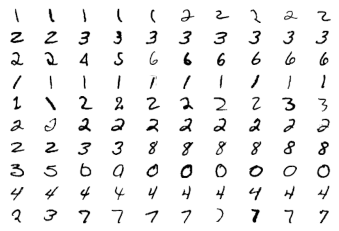

In [35]:
#make lists of 10
zeros = picdata.groupby('clusters').get_group(0)
ones = picdata.groupby('clusters').get_group(1)
twos = picdata.groupby('clusters').get_group(2)
threes = picdata.groupby('clusters').get_group(3)
fours = picdata.groupby('clusters').get_group(4)
fives = picdata.groupby('clusters').get_group(5)
sixes = picdata.groupby('clusters').get_group(6)
sevens = picdata.groupby('clusters').get_group(7)
eights = picdata.groupby('clusters').get_group(8)
nines = picdata.groupby('clusters').get_group(9)

del zeros['clusters']
del ones['clusters']
del twos['clusters']
del threes['clusters']
del sixes['clusters']
del sevens['clusters']
del eights['clusters']
del nines['clusters']
del fours['clusters']
del fives['clusters']

ones.to_numpy()
twos.to_numpy()
threes.to_numpy()
fours.to_numpy()
fives.to_numpy()
sixes.to_numpy()
sevens.to_numpy()
eights.to_numpy()
nines.to_numpy()

myar = numpy.array(zeros[0:10])
myar = numpy.append(myar, ones[0:10], axis = 0)  
myar = numpy.append(myar, twos[0:10], axis = 0)
myar = numpy.append(myar, threes[0:10], axis = 0)
myar = numpy.append(myar, fours[0:10], axis = 0)
myar = numpy.append(myar, fives[0:10], axis = 0)
myar = numpy.append(myar, sixes[0:10], axis = 0)
myar = numpy.append(myar, sevens[0:10], axis = 0)
myar = numpy.append(myar, eights[0:10], axis = 0)
myar = numpy.append(myar, nines[0:10], axis = 0)
    
reshaped = []
print(myar.shape)
for image in myar: 
    imagepic = image.reshape(28, 28)
    reshaped.append(imagepic)
print(len(reshaped))
for i in range(0, len(reshaped)):
    plt.subplot(10, 10, i+1)
    plt.axis("off")
    image = reshaped[i]
    plt.imshow(image, cmap = "Greys")
plt.show()

The images are mostly clustered correctly, with some issues. 1 and 5 tended to show up the best, while 4, 7, 9 and 8 tended to show up the worst. The numbers that tend to show up the best are the more unique numbers that don't have as mucn variation in how they are written - the numbers that are less similar to one another don't have as many issues with their appearences. 

PROBLEM 2: 

Write a Python function that computes the probability function for a hypergeometric random
variable, X. (See the class notes and Wikipedia page for this formula.) Your function should
take inputs:
N = number of available bits to select from
K = number of available bits that are 1
n = number of bits drawn at random
k = number of bits drawn that are 1
Your function should return P(X = k). Using your function, compute the following:

(a) Recall the “lady drinking tea” example from class. Verify that your function gives the
correct values for k = 2, 3, 4. (See the notes for the right answers!)

In [2]:
from math import factorial
def ncr(n, k):
    nfact = factorial(n)
    kfact = factorial(k)
    nminuskfact = factorial(n-k)
    return nfact/(kfact*nminuskfact)
def hypergeometric(bign, bigk, n, k):
    kchoosek= ncr(bigk, k)
    nminusks = ncr((bign-bigk), (n-k))
    nchoosen = ncr(bign, n)
    return (kchoosek*nminusks)/nchoosen



In [3]:
print("lady drinking tea example: \nP(k=2)=", hypergeometric(8,4,4,2))
print("P(k=3)=", hypergeometric(8,4,4,3))
print("P(k=4)=", hypergeometric(8,4,4,4))

lady drinking tea example: 
P(k=2)= 0.5142857142857142
P(k=3)= 0.22857142857142856
P(k=4)= 0.014285714285714285


(b) You are running an internet security firm trying to catch packets sent to a server by
hackers. There are 100 packets sent to the server, with 10 of them from hackers, 90 from
legitimate traffic. If you sample 50 packets at random, what is the probability that you
will capture all 10 packets from the hackers?

In [4]:
pcatchall=hypergeometric(100,10,50,10)
print("the probability of catching them all is ", pcatchall)

the probability of catching them all is  0.0005934196725858287


(c) What is the chance that you will capture at least half of the hackers’ packets? That is,
what is P(X ≥ 5)? Hint: You are going to need to sum probabilities from multiple
calls to your function

In [5]:
probabilities = [5,6,7,8,9,10]
totalprob=0
for prob in probabilities:
    indivprob=hypergeometric(100,10,50,prob)
    totalprob+=indivprob
print("the probability is", totalprob)

the probability is 0.6296667731127675


PROBLEM 3: 
Here we are going to test a hypotheses about cardiac measurements from a study of cardiac
disease contained in the file “cardiac.csv”.
To understand what the variables mean, read the description of the data set here: http:
//tomfletcher.github.io/FoDA/homeworks/cardiac-explanation.txt
You want to test the hypothesis that women are more likely to have hypertension (high blood
pressure) than men. Hypertension is the variable hxofHT (be careful, hxofHT = 0 indicates
they do have hypertension) and gender is male = 0, female = 1.

(a) What is the 2 × 2 contingency table for this data? The rows of your table should be
gender and the columns should be hxofHT. The four entries of the table will be counts
from the data. For example, one entry will count the number of people who are both
women (gender = 1) and have hypertension (hxofHT = 0), etc.

In [7]:
#contingency table 
import pandas
cardiaccsv=pandas.read_csv('/Users/sophiawalton/Desktop/CS3501/Homework2/cardiac.csv')
cardiacdata = pandas.DataFrame(cardiaccsv)

#make groups
fh = cardiacdata.groupby('gender').get_group(1).groupby('hxofHT').get_group(0)
fnh = cardiacdata.groupby('gender').get_group(1).groupby('hxofHT').get_group(1)

mh = cardiacdata.groupby('gender').get_group(0).groupby('hxofHT').get_group(0)
mnh = cardiacdata.groupby('gender').get_group(0).groupby('hxofHT').get_group(1)

fhnum = len(fh.index)
fnhnum = len(fnh.index)
mhnum = len(mh.index)
mnhnum = len(mh.index)

In [8]:
data = [[fhnum, fnhnum], [mhnum, mnhnum]]
print(pandas.DataFrame(data))


     0    1
0  249   89
1  144  144


(b) Using your hypergeometric probability function from the previous question, compute
the probability of getting exactly this table.

In [10]:
#probability of this table - probabilities to consider: probabilities of men and women being at these numbers, probabilites of hypertension
#probability of this being the number of women: 
#consider if 50 percent of people are likely to be women 
pnumwomen=hypergeometric(1000, 500, 626, 338)

#pnum positives 
#the chances that this exact number of women are positive
pwpos = hypergeometric(338, 249, 249, 249)
pmpos = hypergeometric(288, 144, 144, 144)

ptotal = pnumwomen*pwpos*pmpos
print(ptotal)

5.164500630911759e-173


(c) If you want to test if women have hypertension more frequently than men, what is the null hypothesis?

Null Hypothesis: Women and men experience hypertension at the same rate. 

(d) Again, using your hypergeometric probability function, perform the Fisher exact test to
get a p value for the hypothesis that women have hypertension more frequently than
men. Can you “reject the null hypothesis” with the threshold p ≤ 0.05?

In [43]:
#check the probability that women have more hypertension than men assuming that they occur at equal rates
#probability that women is greater than 0.5
totalhyper=0
for i in range (26, 50, 1):
    thisprob=hypergeometric(338, 169, 50, i)
    totalhyper += thisprob
#do same for men 
men = 0
for i in range(26, 50, 1):
    thisprob=hypergeometric(288,144, 50, i)
    men+= thisprob
#subtract the two to see how likely this is 
print(totalhyper-men)

0.000934318993397687


Since p<0.05, we can reject the null hypothesis that women and men get hypertension at the same rate. 